In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv('/Users/soroushesnaashari/Customer_Data.csv', encoding='unicode_escape')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
data.info()
# "CUST_ID" is not numeric so we have to delete the column in order to do our work
# Two columns, "CREDIT_LIMIT" and "MINIMUM_PAYMENTS", have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# Remove rows with missing values
cleaned_data = data.dropna()
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

In [5]:
# Remove the 'CUST_ID' column for numerical analysis
cleaned_data_numeric = cleaned_data.drop(columns=['CUST_ID'])

---

# PreProcessing

### Plot 1: Distribution of BALANCE

Text(0.5, 1.0, 'Distribution of BALANCE')

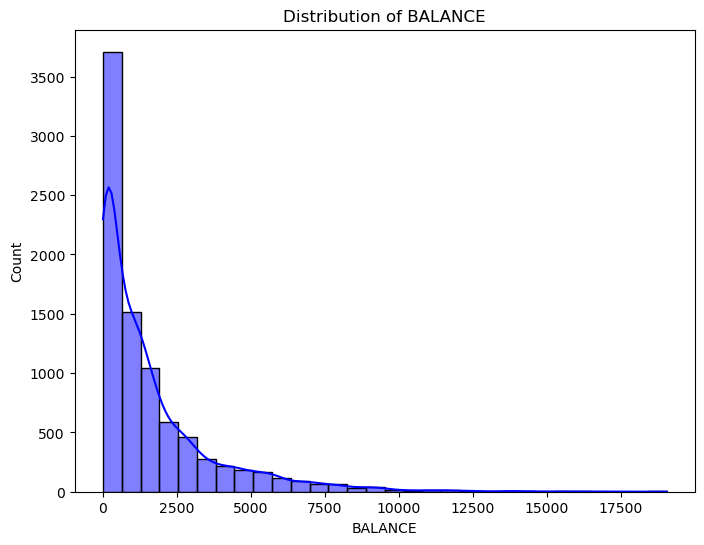

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data_numeric['BALANCE'], bins=30, kde=True, color='blue')
plt.title('Distribution of BALANCE')

### Plot 2: Distribution of PURCHASES

Text(0.5, 1.0, 'Distribution of PURCHASES')

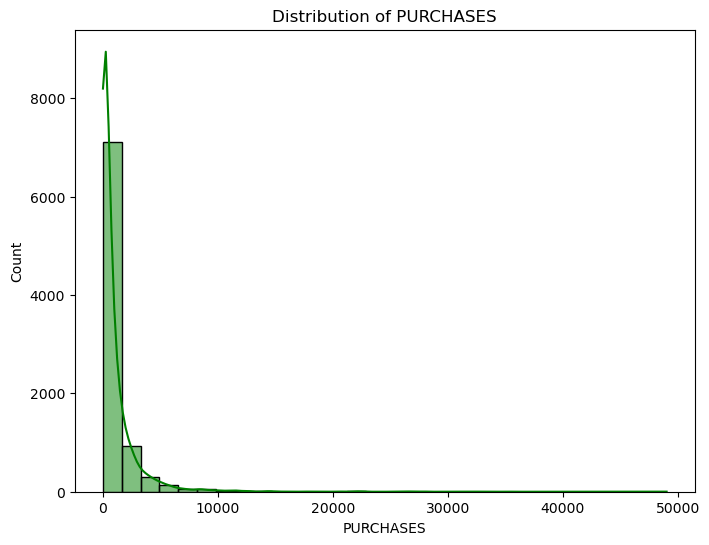

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data_numeric['PURCHASES'], bins=30, kde=True, color='green')
plt.title('Distribution of PURCHASES')

### Plot 3: Box Plot of CREDIT_LIMIT

Text(0.5, 1.0, 'Boxplot of CREDIT_LIMIT')

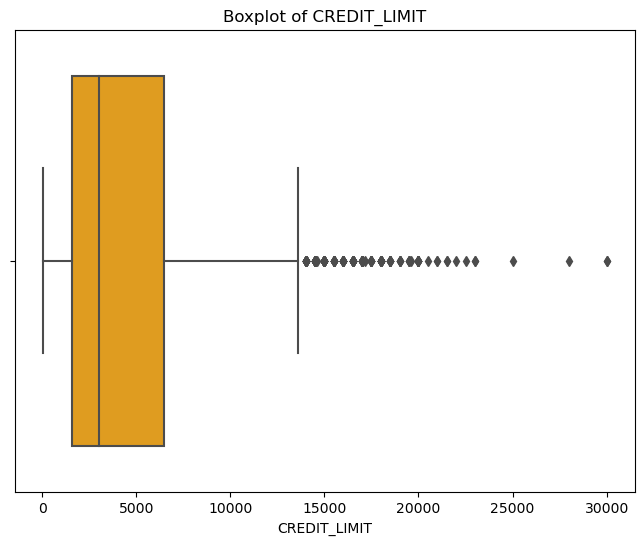

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_data_numeric['CREDIT_LIMIT'], color='orange')
plt.title('Boxplot of CREDIT_LIMIT')

### Plot 4: Scatter Plot of ONEOFF_PURCHASES vs. INSTALLMENTS_PURCHASES

Text(0.5, 1.0, 'ONEOFF_PURCHASES vs. INSTALLMENTS_PURCHASES')

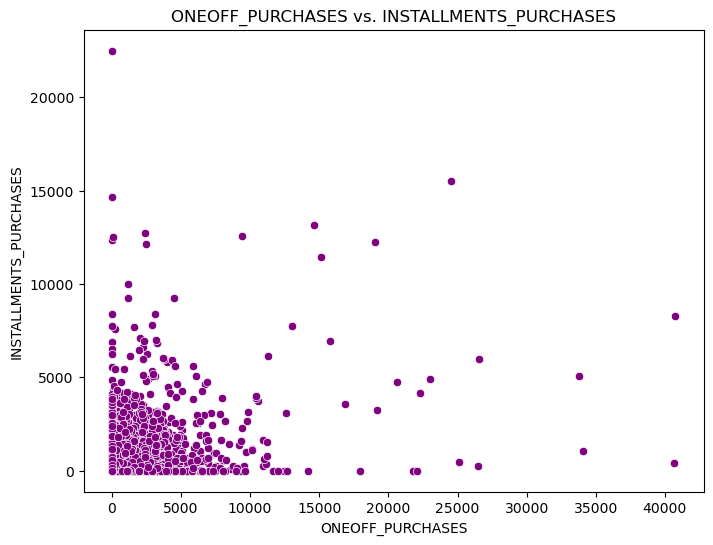

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ONEOFF_PURCHASES', y='INSTALLMENTS_PURCHASES', data=cleaned_data_numeric, color='purple')
plt.title('ONEOFF_PURCHASES vs. INSTALLMENTS_PURCHASES')

### Plot 5: Heatmap of Correlations

Text(0.5, 1.0, 'Correlation Heatmap')

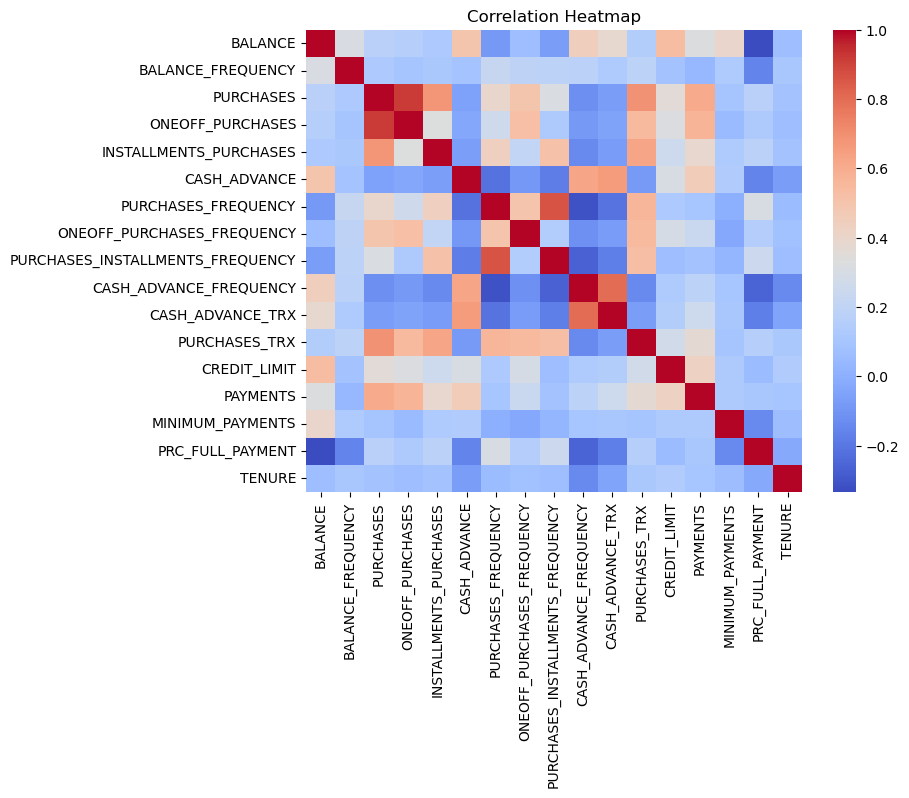

In [10]:
plt.figure(figsize=(8, 6))
correlation_matrix = cleaned_data_numeric.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')

### Plot 6: Distribution of TENURE

Text(0.5, 1.0, 'Distribution of TENURE')

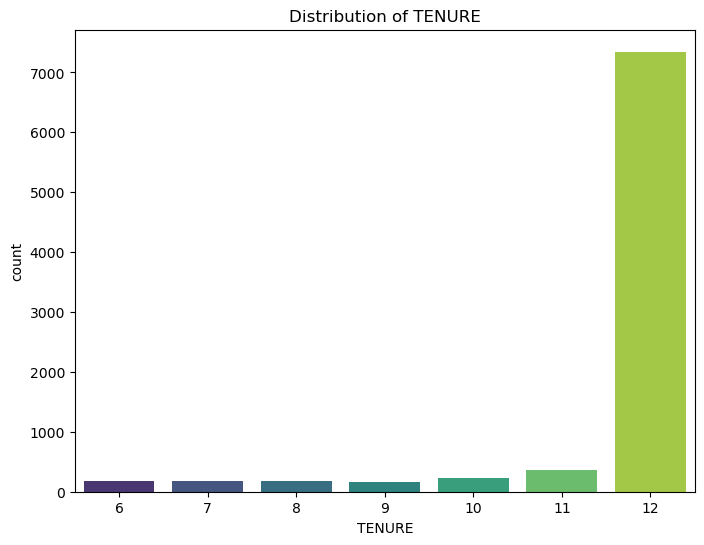

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TENURE', data=cleaned_data_numeric, palette='viridis')
plt.title('Distribution of TENURE')

### Plot 7: Relationship between PURCHASES and PAYMENTS

Text(0.5, 1.0, 'PURCHASES vs. PAYMENTS')

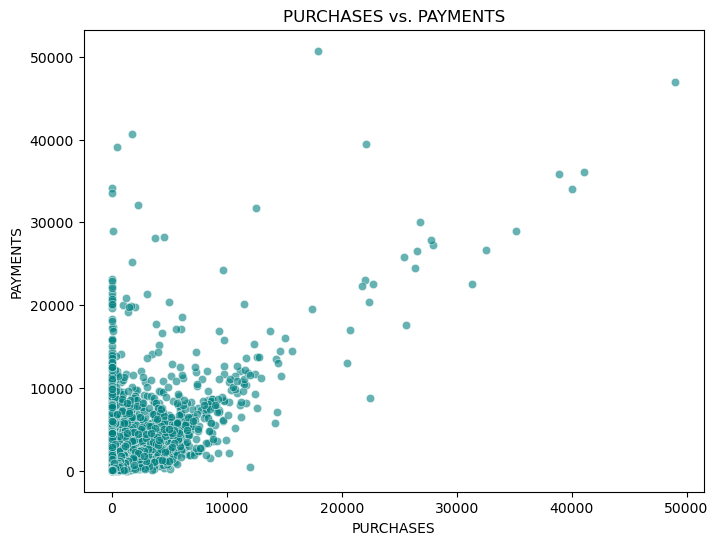

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PURCHASES', y='PAYMENTS', data=cleaned_data_numeric, alpha=0.6, color='teal')
plt.title('PURCHASES vs. PAYMENTS')

### Plot 8: Boxplot of PRC_FULL_PAYMENT

Text(0.5, 1.0, 'Boxplot of PRC_FULL_PAYMENT')

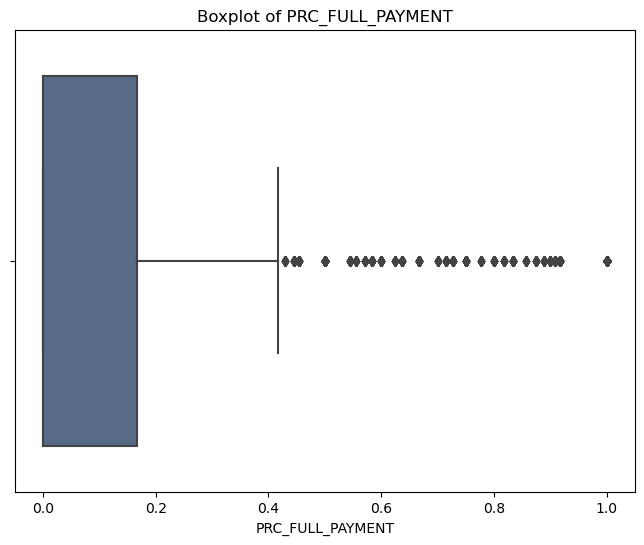

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_data_numeric['PRC_FULL_PAYMENT'], color= '#4f6a8f')
plt.title('Boxplot of PRC_FULL_PAYMENT')

### Plot 9: Distribution of MINIMUM_PAYMENTS

Text(0.5, 1.0, 'Distribution of MINIMUM_PAYMENTS')

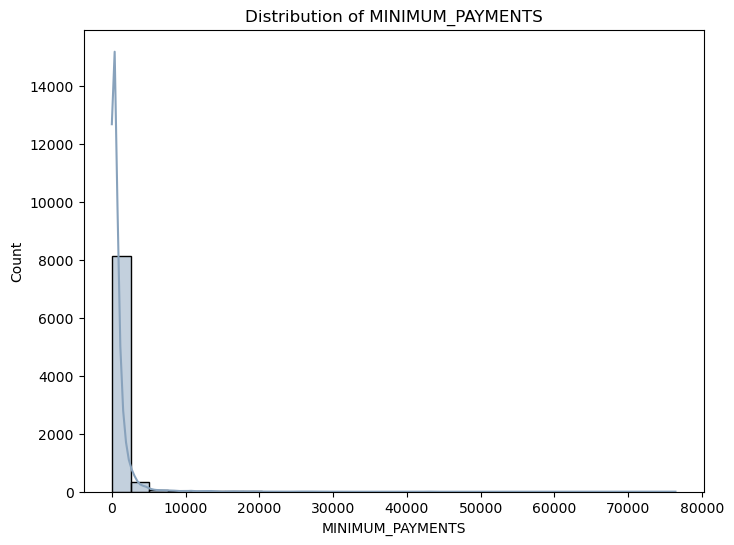

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data_numeric['MINIMUM_PAYMENTS'], bins=30, kde=True, color='#88a2bc')
plt.title('Distribution of MINIMUM_PAYMENTS')

### Plot 10: Bar Plot of CASH_ADVANCE_TRX

Text(0.5, 1.0, 'CASH_ADVANCE_TRX Distribution')

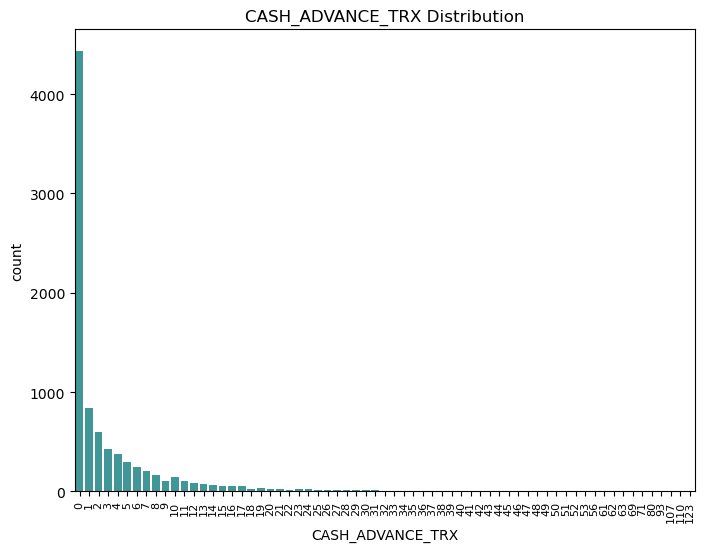

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CASH_ADVANCE_TRX', data=cleaned_data_numeric, color='#32a4a7')
plt.xticks(rotation=90, fontsize=8)
plt.title('CASH_ADVANCE_TRX Distribution')

### Plot 11: Pair Plot of several Columns

/Users/soroushesnaashari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


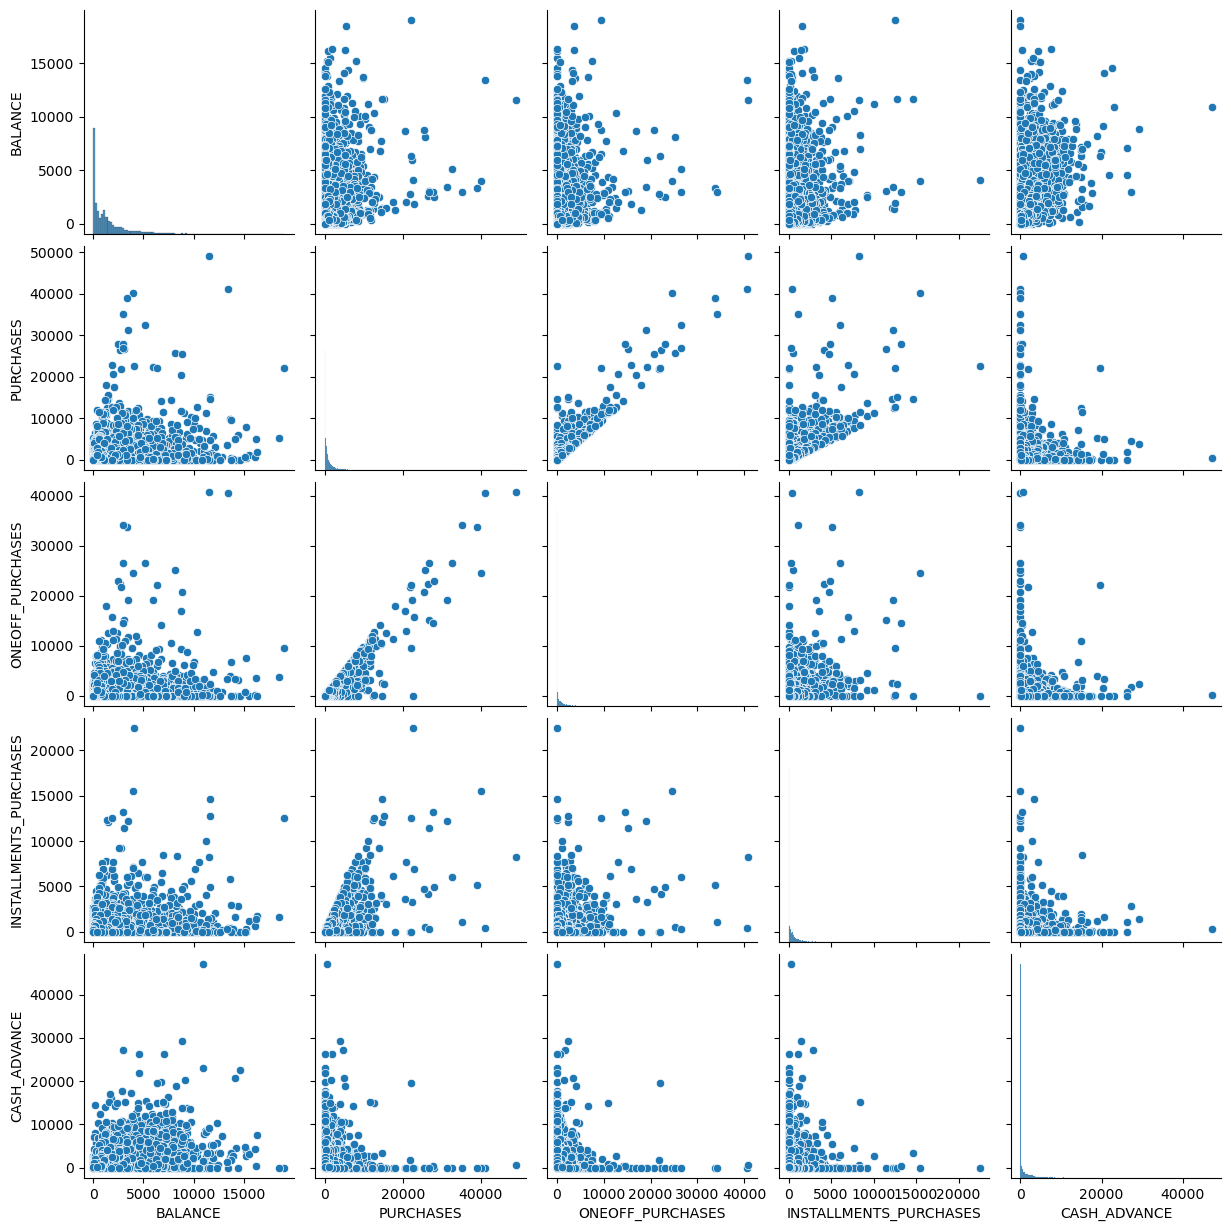

In [16]:
sns.pairplot(cleaned_data_numeric[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']])
plt.show()

---

# Scaling

In this section I'm going to find out about this fact that which scaler is more suitable for each algorithms, MinMaxScaler or StandardScaler?

In [17]:
# Normalize data with MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(cleaned_data_numeric)

In [18]:
# Normalize data with StandardScaler
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(cleaned_data_numeric)

### Scaling K-Means

In [19]:
# K-Means Clustering on both scaled datasets
kmeans_minmax = KMeans(n_clusters=3, random_state=42, n_init=10).fit(minmax_scaled_data)
kmeans_standard = KMeans(n_clusters=3, random_state=42, n_init=10).fit(standard_scaled_data)

In [20]:
# Calculate Silhouette Scores
silhouette_minmax = silhouette_score(minmax_scaled_data, kmeans_minmax.labels_)
silhouette_standard = silhouette_score(standard_scaled_data, kmeans_standard.labels_)

print(f"Silhouette Score (MinMaxScaler): {silhouette_minmax}")
print(f"Silhouette Score (StandardScaler): {silhouette_standard}")

Silhouette Score (MinMaxScaler): 0.37642565284553325
Silhouette Score (StandardScaler): 0.24709726016009056


So we found out that for K-Means algorithm MinMaxScaler is more accurate

### Scaling DBSCAN

In [21]:
# DBSCAN parameters
eps = 0.5    # Editable
min_samples = 5

# DBSCAN with MinMaxScaler
dbscan_minmax = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_minmax_labels = dbscan_minmax.fit_predict(minmax_scaled_data)

# Check if clusters are formed
if len(set(dbscan_minmax_labels)) > 1:
    silhouette_minmax = silhouette_score(minmax_scaled_data, dbscan_minmax_labels)
else:
    silhouette_minmax = -1    # Invalid silhouette score when only one cluster

In [22]:
# DBSCAN with StandardScaler
dbscan_standard = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_standard_labels = dbscan_standard.fit_predict(standard_scaled_data)

In [23]:
# Check if clusters are formed
if len(set(dbscan_standard_labels)) > 1:
    silhouette_standard = silhouette_score(standard_scaled_data, dbscan_standard_labels)
else:
    silhouette_standard = -1    # Invalid silhouette score when only one cluster

print(f"DBSCAN Silhouette Score (MinMaxScaler): {silhouette_minmax}")
print(f"DBSCAN Silhouette Score (StandardScaler): {silhouette_standard}")

DBSCAN Silhouette Score (MinMaxScaler): 0.34664688884697437
DBSCAN Silhouette Score (StandardScaler): -0.465117752115066


MinMaxscaler is more suitable for DBSCAN algorithm, StandardScaler's score is negative therefore it is possible to say that most points may have been assigned to noise or wrong clusters

### Scaling Gaussian Mixture Model

In [24]:
# GMM parameters
n_components = 3    # Editable

# GMM with MinMaxScaler
gmm_minmax = GaussianMixture(n_components=n_components, random_state=42)
gmm_minmax_labels = gmm_minmax.fit_predict(minmax_scaled_data)
silhouette_minmax = silhouette_score(minmax_scaled_data, gmm_minmax_labels)

In [25]:
# GMM with StandardScaler
gmm_standard = GaussianMixture(n_components=n_components, random_state=42)
gmm_standard_labels = gmm_standard.fit_predict(standard_scaled_data)
silhouette_standard = silhouette_score(standard_scaled_data, gmm_standard_labels)

In [26]:
print(f"GMM Silhouette Score (MinMaxScaler): {silhouette_minmax}")
print(f"GMM Silhouette Score (StandardScaler): {silhouette_standard}")

GMM Silhouette Score (MinMaxScaler): 0.13800208940780906
GMM Silhouette Score (StandardScaler): 0.11512267967773161


Similarly, in this algorithm also MinMaxScaler works better

---

# Clustering

### Clustering using "K-Mean" algorithm

In [27]:
# K-Means parameter
n_clusters = 3

# Apply K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(minmax_scaled_data)

# Evaluate K-Means with Silhouette Score
kmeans_silhouette = silhouette_score(minmax_scaled_data, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

K-Means Silhouette Score: 0.37642565284553325


### Clustering using "DBSCAN" algorithm

In [28]:
# DBSCAN parameters
eps = 0.5
min_samples = 5

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(minmax_scaled_data)

# Evaluate DBSCAN with Silhouette Score (only if valid clusters exist)
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(minmax_scaled_data, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN failed to form meaningful clusters.")

DBSCAN Silhouette Score: 0.34664688884697437


### Clustering using "Gaussian Mixture Model" algorithm

In [29]:
# GMM parameter
n_components = 3

# Apply GMM
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm_labels = gmm.fit_predict(minmax_scaled_data)

# Evaluate GMM with Silhouette Score
gmm_silhouette = silhouette_score(minmax_scaled_data, gmm_labels)
print(f"GMM Silhouette Score: {gmm_silhouette}")

GMM Silhouette Score: 0.13800208940780906


### Result

The best result was dedicated to **"K-Mean"** algorithm, so let's do some optimization for these algorithms

---

# Optimization

### K-Mean

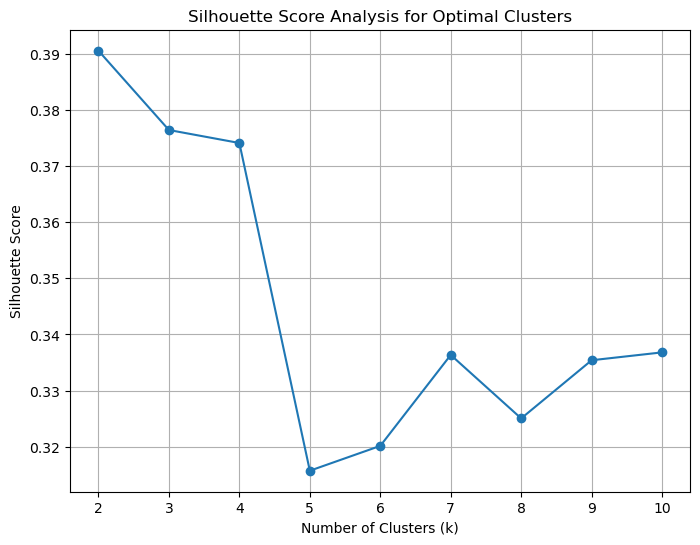

In [30]:
# Define the range of cluster numbers to evaluate
cluster_range = range(2, 11)
silhouette_scores = []

# Compute silhouette score for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(minmax_scaled_data)
    silhouette_avg = silhouette_score(minmax_scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Score Analysis for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

**Result:** So as it is obvious, two clusters give us the most accurate result

### DBSCAN

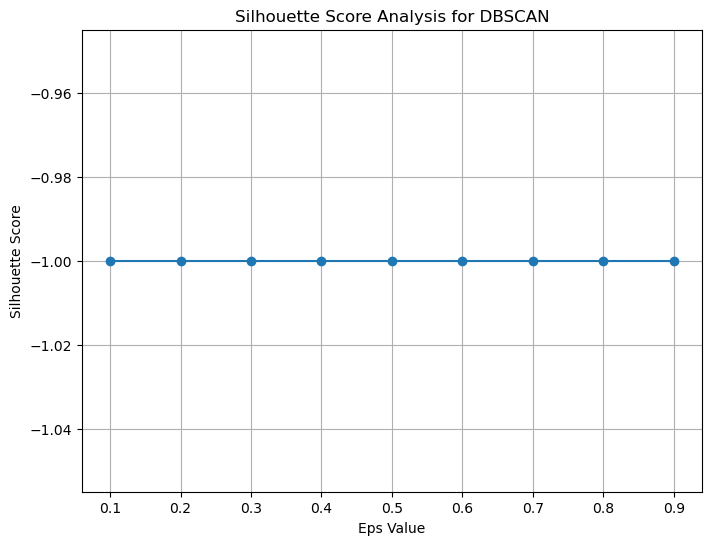

In [31]:
# Define range for eps values to test
eps_range = np.arange(0.1, 1.0, 0.1)    # Test eps from 0.1 to 1.0 in steps of 0.1
silhouette_scores = []

# Fixed min_samples
min_samples = 5

# Compute silhouette score for each eps value
for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(minmax_scaled_data)
    
    # Calculate Silhouette Score only if valid clusters exist
    if len(set(dbscan_labels)) > 1 and -1 not in set(dbscan_labels):
        silhouette_avg = silhouette_score(minmax_scaled_data, dbscan_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(eps_range, silhouette_scores, marker='o')
plt.title("Silhouette Score Analysis for DBSCAN")
plt.xlabel("Eps Value")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

**CAUTION:** As we get just -1 result it means that our dataset is not really appropriate to cluster by DBSCAN, so I will try to increase the eps range to see if anything changed

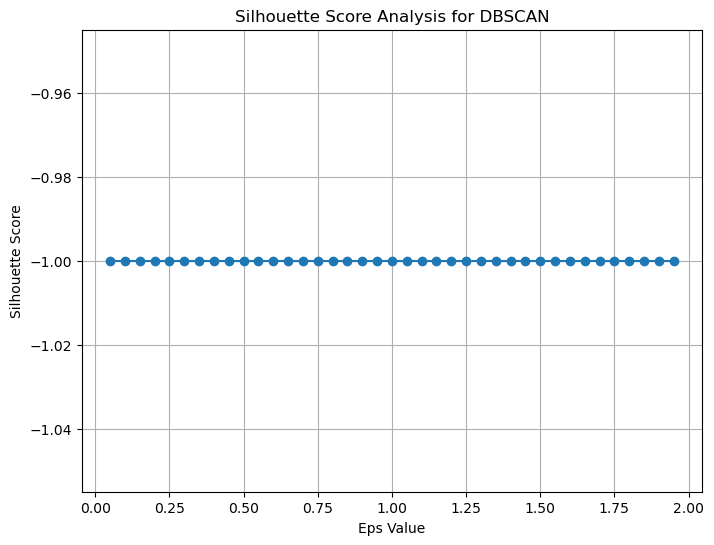

In [32]:
eps_range = np.arange(0.05, 2.0, 0.05)  # Test a wider range with finer granularity
silhouette_scores = []

# Fixed min_samples
min_samples = 5

# Compute silhouette score for each eps value
for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(minmax_scaled_data)
    
    # Calculate Silhouette Score only if valid clusters exist
    if len(set(dbscan_labels)) > 1 and -1 not in set(dbscan_labels):
        silhouette_avg = silhouette_score(minmax_scaled_data, dbscan_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(eps_range, silhouette_scores, marker='o')
plt.title("Silhouette Score Analysis for DBSCAN")
plt.xlabel("Eps Value")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

There isn't any changes so now I will Check the distribution of distances between points to identify a reasonable eps

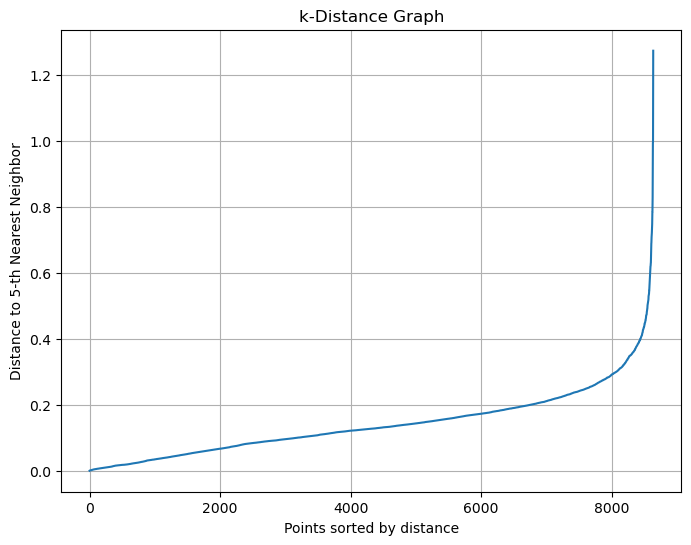

In [33]:
from sklearn.neighbors import NearestNeighbors

# Compute the k-distance graph
k = 5
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(minmax_scaled_data)
distances, indices = neighbors.kneighbors(minmax_scaled_data)

# Sort and plot distances
distances = np.sort(distances[:, k-1])
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title("k-Distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {k}-th Nearest Neighbor")
plt.grid(True)
plt.show()

For this plot the "**Elbow Point"** might have the best amount of eps, so around 0.3, 0.4 or 0.5 it must be the best eps amount. As we find out from our first shot this mount is 0.5 (you can find it at the first clustering try for DBSCAN)

**Result:** DBSCAN can not optimized more and the most optimized version was our first try

### GMM

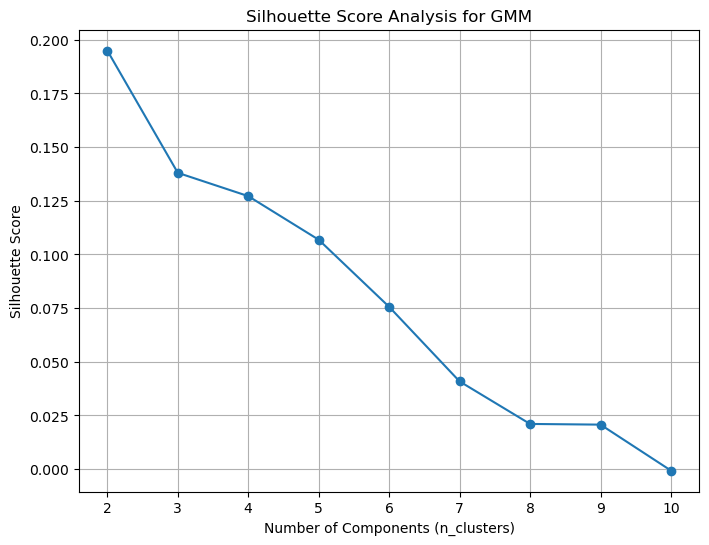

In [34]:
# Define the range for number of components to test
n_components_range = range(2, 11)
silhouette_scores = []

# Compute silhouette score for each number of components
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm_labels = gmm.fit_predict(minmax_scaled_data)
    silhouette_avg = silhouette_score(minmax_scaled_data, gmm_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, silhouette_scores, marker='o')
plt.title("Silhouette Score Analysis for GMM")
plt.xlabel("Number of Components (n_clusters)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

**Result:** Two components are the most accurate result for GMM which is not better than K-Mean's result so it is the end for GMM

---

# Final Result

In [35]:
# K-Means parameter
n_clusters = 2

# Apply K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(minmax_scaled_data)

# Evaluate K-Means with Silhouette Score
kmeans_silhouette = silhouette_score(minmax_scaled_data, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

K-Means Silhouette Score: 0.3905501972265014


Last score was 0.37642565284553325, but it improved to **0.3905501972265014**

In [36]:
# GMM parameter
n_components = 2

# Apply GMM
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm_labels = gmm.fit_predict(minmax_scaled_data)

# Evaluate GMM with Silhouette Score
gmm_silhouette = silhouette_score(minmax_scaled_data, gmm_labels)
print(f"GMM Silhouette Score: {gmm_silhouette}")

GMM Silhouette Score: 0.19495185377857438


Last score was 0.13800208940780906, but it improved to **0.19495185377857438**

**So K-Mean gives us the best result among these three algorithms**

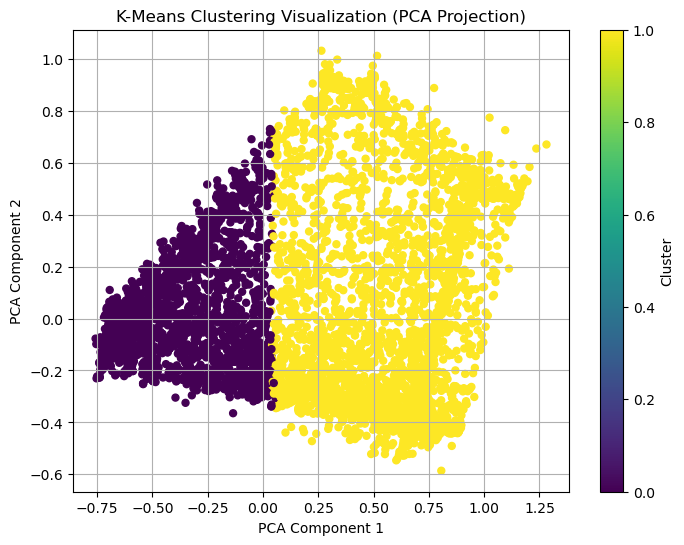

In [37]:
# Perform PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(minmax_scaled_data)

# Add cluster labels to the dataset for visualization
kmeans_labels = KMeans(n_clusters=2, random_state=42, n_init=10).fit_predict(minmax_scaled_data)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis', s=25)
plt.title("K-Means Clustering Visualization (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

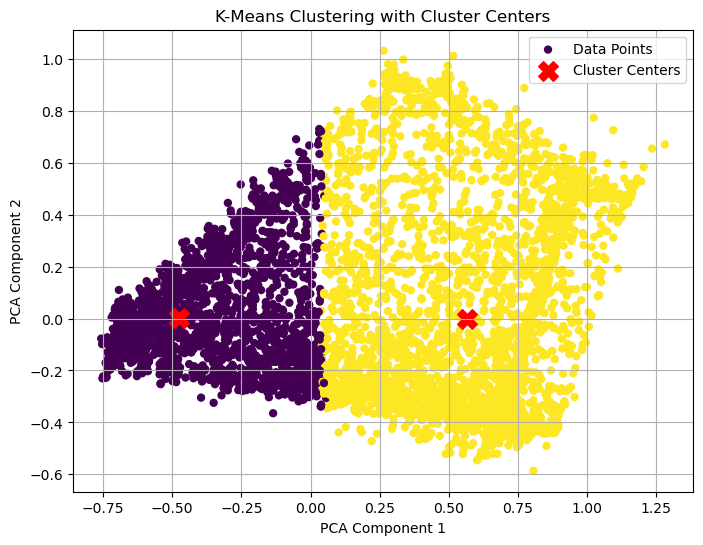

In [38]:
# Fit K-Means again to get cluster centers
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(minmax_scaled_data)
cluster_centers = pca.transform(kmeans.cluster_centers_)  # Transform centers to PCA space

# Scatter plot with cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis', s=25, label="Data Points")
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label="Cluster Centers")
plt.title("K-Means Clustering with Cluster Centers")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

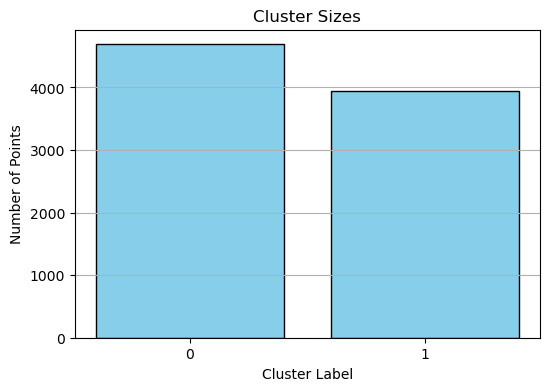

In [39]:
# Count data points in each cluster
cluster_counts = np.unique(kmeans_labels, return_counts=True)

# Bar plot
plt.figure(figsize=(6, 4))
plt.bar(cluster_counts[0], cluster_counts[1], color='skyblue', edgecolor='black')
plt.title("Cluster Sizes")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Points")
plt.xticks(cluster_counts[0])
plt.grid(axis='y')
plt.show()

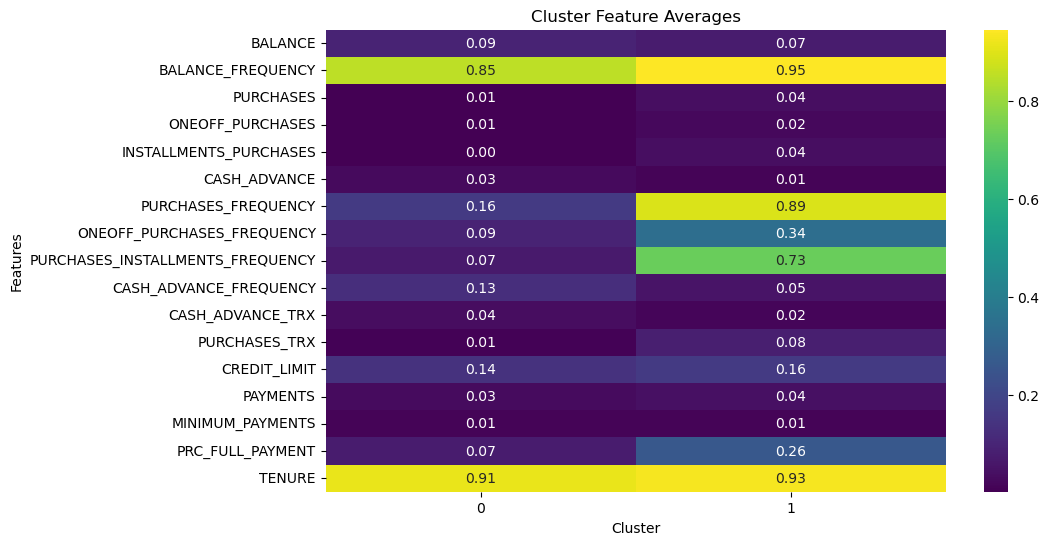

In [41]:
# Convert scaled data back to a DataFrame
scaled_df = pd.DataFrame(minmax_scaled_data, columns=cleaned_data_numeric.columns)
scaled_df['Cluster'] = kmeans_labels

# Calculate cluster-wise feature means
cluster_means = scaled_df.groupby('Cluster').mean()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.T, cmap='viridis', annot=True, fmt=".2f")
plt.title("Cluster Feature Averages")
plt.xlabel("Cluster")
plt.ylabel("Features")
plt.show()

# The End !!!
**Mohammad Soroush Esnaashari**